<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Importing Libraries </b>
</div>

In [2]:
#Import necessary libraries
import pandas as pd  #pandas for data manipulation and analysis
import numpy as np   #numpy for numerical operations
from pprint import PrettyPrinter  #pprint for pretty printing of data structures
from datetime import datetime, time  #datetime for working with dates and times
import matplotlib.pyplot as plt  #matplotlib for basic data visualization
import seaborn as sns  #seaborn for statistical data visualization
import shap

In [3]:
#Set the maximum number of displayed columns for Pandas DataFrames to 'None' (display all columns)
pd.set_option('display.max_columns', None)
#Set the maximum number of displayed rows for Pandas DataFrames to 30
pd.set_option('display.max_rows', 15)

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Loading Datasets </b>
</div>

In [4]:
df_original = pd.read_excel(r"D:\Projects\customer_data.xlsx")

In [5]:
df=df_original.copy()

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Pre-processing

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Initial Inspection</div> 

In [7]:
#View first 5 rows
df.head()

,Customer_ID,Age,Gender,City,Signup_Date,Last_Login_Date,Subscription_Type,Monthly_Charges,Tenure_Months,Total_Revenue,Usage_Frequency,Support_Tickets,Churn_Flag
0,C001,28,Male,Bangalore,2022-01-15,2024-12-20,Premium,999,24,23976,18,1,0
1,C002,35,Female,Hyderabad,2021-08-10,2024-09-12,Basic,499,36,17964,5,6,1
2,C003,42,Male,Delhi,2020-05-20,2024-12-28,Standard,699,48,33552,14,2,0
3,C004,26,Female,Chennai,2023-03-01,2024-06-15,Basic,499,15,7485,4,5,1
4,C005,31,Male,Pune,2022-11-18,2024-12-30,Premium,999,25,24975,20,0,0


In [8]:
#dataset shape
df.shape

(15, 13)

In [9]:
#data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        15 non-null     object        
 1   Age                15 non-null     int64         
 2   Gender             15 non-null     object        
 3   City               15 non-null     object        
 4   Signup_Date        15 non-null     datetime64[ns]
 5   Last_Login_Date    15 non-null     datetime64[ns]
 6   Subscription_Type  15 non-null     object        
 7   Monthly_Charges    15 non-null     int64         
 8   Tenure_Months      15 non-null     int64         
 9   Total_Revenue      15 non-null     int64         
 10  Usage_Frequency    15 non-null     int64         
 11  Support_Tickets    15 non-null     int64         
 12  Churn_Flag         15 non-null     int64         
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 1.7+ KB


In [10]:
#statistical summary (numerical columns)
df.describe()

,Age,Signup_Date,Last_Login_Date,Monthly_Charges,Tenure_Months,Total_Revenue,Usage_Frequency,Support_Tickets,Churn_Flag
count,15.000000,15,15,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,33.866667,2021-11-23 00:00:00,2024-09-14 00:00:00,732.333333,33.933333,25859.400000,10.866667,3.400000,0.466667
min,24.000000,2019-09-10 00:00:00,2024-02-19 00:00:00,499.000000,10.000000,4990.000000,3.000000,0.000000,0.000000
25%,28.500000,2020-12-28 12:00:00,2024-06-02 00:00:00,499.000000,23.500000,14720.500000,6.000000,1.000000,0.000000
50%,34.000000,2022-01-15 00:00:00,2024-12-10 00:00:00,699.000000,32.000000,26562.000000,9.000000,3.000000,0.000000
75%,38.500000,2022-12-20 12:00:00,2024-12-26 00:00:00,999.000000,47.000000,32853.000000,16.500000,5.500000,1.000000
max,45.000000,2023-08-15 00:00:00,2024-12-30 00:00:00,999.000000,60.000000,59940.000000,20.000000,8.000000,1.000000
std,6.345602,NaN,NaN,212.692490,16.280868,14875.096296,5.926534,2.640346,0.516398


In [11]:
#null counts
df.isnull().sum()

Customer_ID          0
Age                  0
Gender               0
City                 0
Signup_Date          0
Last_Login_Date      0
Subscription_Type    0
Monthly_Charges      0
Tenure_Months        0
Total_Revenue        0
Usage_Frequency      0
Support_Tickets      0
Churn_Flag           0
dtype: int64

In [12]:
#count of duplicate rows
df.duplicated().sum()

np.int64(0)

In [13]:
#Check column names
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'City', 'Signup_Date',
       'Last_Login_Date', 'Subscription_Type', 'Monthly_Charges',
       'Tenure_Months', 'Total_Revenue', 'Usage_Frequency', 'Support_Tickets',
       'Churn_Flag'],
      dtype='object')

In [14]:
#ensure unique customer ids
df['Customer_ID'].is_unique

True

In [15]:
#churn value counts
df['Churn_Flag'].value_counts()

Churn_Flag
0    8
1    7
Name: count, dtype: int64

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  EXPLORATORY DATA ANALYSIS (EDA)

## Churn Distribution (Target Variable)

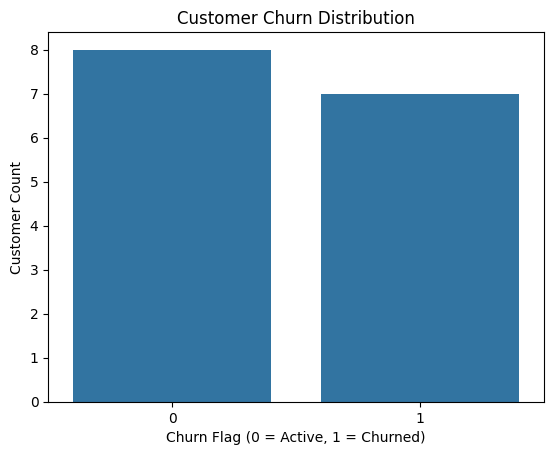

Churn_Flag
0    53.333333
1    46.666667
Name: proportion, dtype: float64

In [16]:
plt.figure()
sns.countplot(x='Churn_Flag', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Flag (0 = Active, 1 = Churned)")
plt.ylabel("Customer Count")
plt.show()

df['Churn_Flag'].value_counts(normalize=True) * 100


## Numerical Feature Distributions

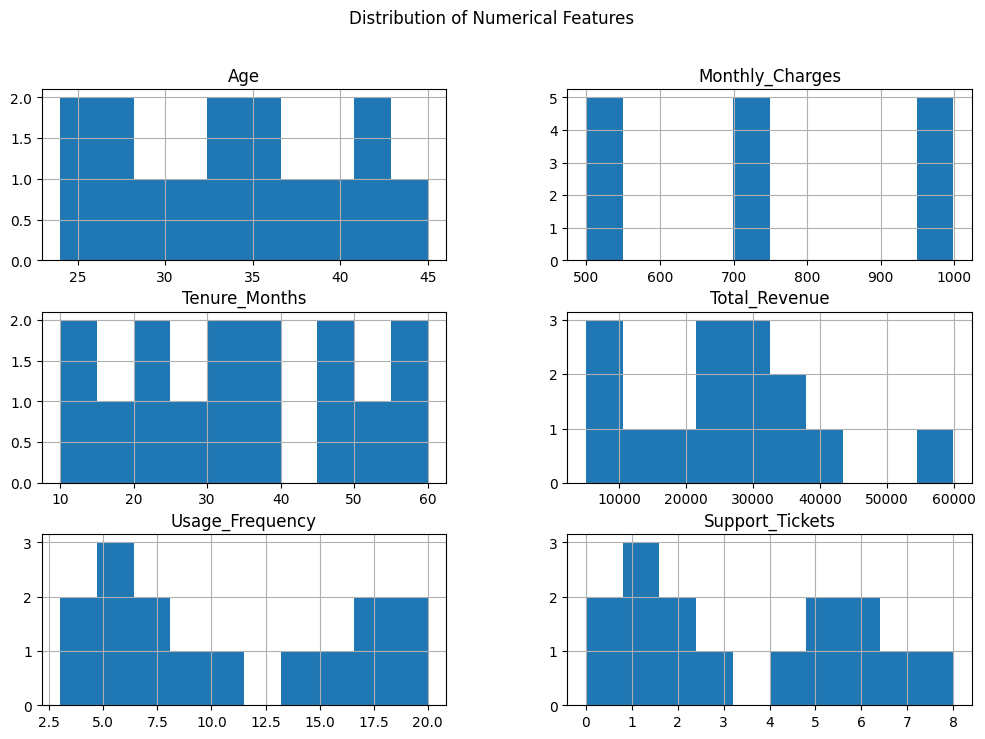

In [17]:
num_cols = [
    'Age', 'Monthly_Charges', 'Tenure_Months',
    'Total_Revenue', 'Usage_Frequency', 'Support_Tickets'
]

df[num_cols].hist(bins=10, figsize=(12,8))
plt.suptitle("Distribution of Numerical Features")
plt.show()


## Churn vs Numerical Features (Mean Comparison)

In [18]:
df.groupby('Churn_Flag')[num_cols].mean()


,Age,Monthly_Charges,Tenure_Months,Total_Revenue,Usage_Frequency,Support_Tickets
Churn_Flag,,,,,,
0,32.750000,836.500000,31.500000,27606.000000,15.500000,1.250000
1,35.142857,613.285714,36.714286,23863.285714,5.571429,5.857143


## Categorical Feature Analysis

### Gender vs Churn

In [19]:
pd.crosstab(df['Gender'], df['Churn_Flag'], normalize='index') * 100


Churn_Flag,0,1
Gender,,
Female,0.0,100.0
Male,100.0,0.0


### Subscription Type vs Churn

In [20]:
pd.crosstab(df['Subscription_Type'], df['Churn_Flag'], normalize='index') * 100


Churn_Flag,0,1
Subscription_Type,,
Basic,40.0,60.0
Premium,100.0,0.0
Standard,20.0,80.0


### City vs Churn

In [21]:
pd.crosstab(df['City'], df['Churn_Flag'], normalize='index') * 100


Churn_Flag,0,1
City,,
Bangalore,66.666667,33.333333
Chennai,50.000000,50.000000
Delhi,100.000000,0.000000
Hyderabad,0.000000,100.000000
Kolkata,0.000000,100.000000
Mumbai,50.000000,50.000000
Pune,50.000000,50.000000


## Usage Frequency vs Churn (Visualization)

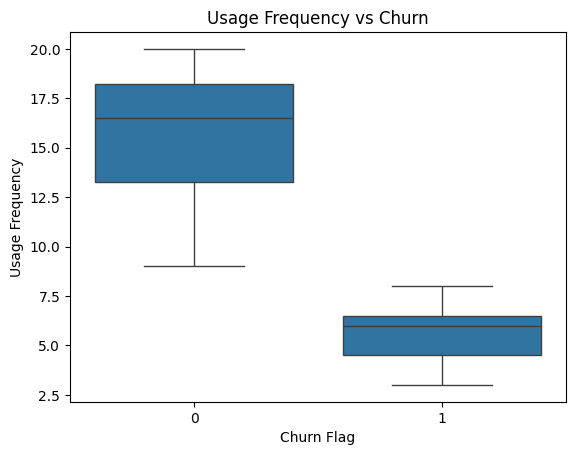

In [22]:
plt.figure()
sns.boxplot(x='Churn_Flag', y='Usage_Frequency', data=df)
plt.title("Usage Frequency vs Churn")
plt.xlabel("Churn Flag")
plt.ylabel("Usage Frequency")
plt.show()


## Support Tickets vs Churn

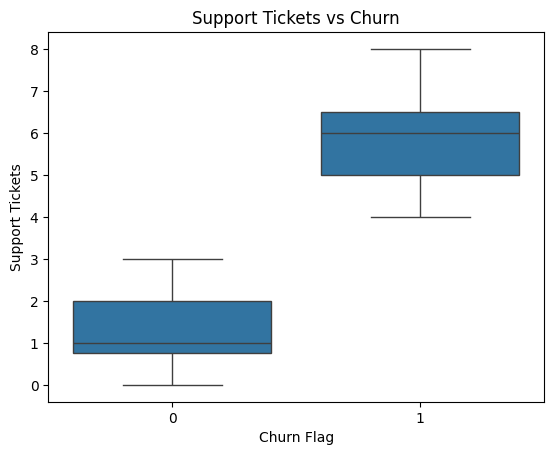

In [23]:
plt.figure()
sns.boxplot(x='Churn_Flag', y='Support_Tickets', data=df)
plt.title("Support Tickets vs Churn")
plt.xlabel("Churn Flag")
plt.ylabel("Support Tickets")
plt.show()


## Correlation Analysis

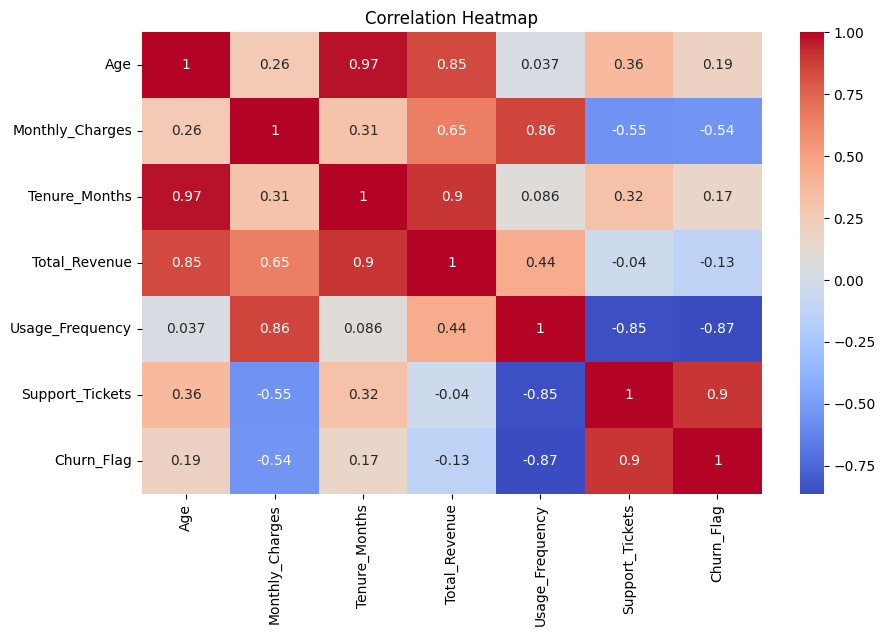

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['Churn_Flag']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  FEATURE ENGINEERING

## Recency Feature

In [25]:
# Reference date = latest login date in dataset
reference_date = df['Last_Login_Date'].max()

df['Recency_Days'] = (reference_date - df['Last_Login_Date']).dt.days


## Average Monthly Spend

In [26]:
df['Avg_Monthly_Spend'] = df['Total_Revenue'] / df['Tenure_Months']


## Engagement Score

In [27]:
df['Engagement_Score'] = df['Usage_Frequency'] - df['Support_Tickets']


## Customer Value Segment

In [28]:
df['Customer_Value'] = pd.cut(
    df['Total_Revenue'],
    bins=[0, 10000, 30000, df['Total_Revenue'].max()],
    labels=['Low', 'Medium', 'High']
)


## Drop Leakage / Non-Predictive Columns

In [29]:
df_model = df.drop(columns=[
    'Customer_ID',
    'Signup_Date',
    'Last_Login_Date'
])


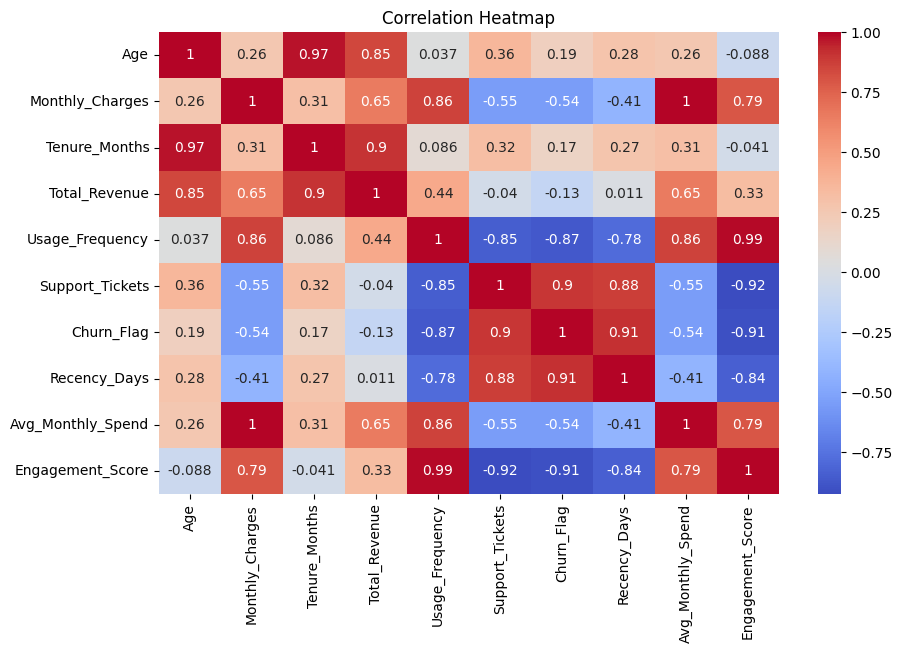

In [33]:
correlation_matrix = df_model.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Feature Scaling and Encoding</div> 

In [35]:
df_model.head()

,Age,Gender,City,Subscription_Type,Monthly_Charges,Tenure_Months,Total_Revenue,Usage_Frequency,Support_Tickets,Churn_Flag,Recency_Days,Avg_Monthly_Spend,Engagement_Score,Customer_Value
0,28,Male,Bangalore,Premium,999,24,23976,18,1,0,10,999.0,17,Medium
1,35,Female,Hyderabad,Basic,499,36,17964,5,6,1,109,499.0,-1,Medium
2,42,Male,Delhi,Standard,699,48,33552,14,2,0,2,699.0,12,High
3,26,Female,Chennai,Basic,499,15,7485,4,5,1,198,499.0,-1,Low
4,31,Male,Pune,Premium,999,25,24975,20,0,0,0,999.0,20,Medium


In [37]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                15 non-null     int64   
 1   Gender             15 non-null     object  
 2   City               15 non-null     object  
 3   Subscription_Type  15 non-null     object  
 4   Monthly_Charges    15 non-null     int64   
 5   Tenure_Months      15 non-null     int64   
 6   Total_Revenue      15 non-null     int64   
 7   Usage_Frequency    15 non-null     int64   
 8   Support_Tickets    15 non-null     int64   
 9   Churn_Flag         15 non-null     int64   
 10  Recency_Days       15 non-null     int64   
 11  Avg_Monthly_Spend  15 non-null     int64   
 12  Engagement_Score   15 non-null     int64   
 13  Customer_Value     15 non-null     category
dtypes: category(1), int64(10), object(3)
memory usage: 1.8+ KB


In [36]:
#convet float to int
df_model['Avg_Monthly_Spend'] = df_model['Avg_Monthly_Spend'].astype(int)

In [39]:
#one hot encoding
df_model = pd.get_dummies(
    df_model,
    columns=['Gender', 'City', 'Subscription_Type', 'Customer_Value'],
    drop_first=True
)


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Model Building

### Importing Libraries

In [67]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report
)


In [40]:
#scaling the data
scaler = StandardScaler()

scale_cols = [
    'Age', 'Monthly_Charges', 'Tenure_Months',
    'Total_Revenue', 'Usage_Frequency', 'Support_Tickets',
    'Recency_Days', 'Avg_Monthly_Spend', 'Engagement_Score'
]

df_model[scale_cols] = scaler.fit_transform(df_model[scale_cols])


In [41]:
#Final Feature Set
X = df_model.drop('Churn_Flag', axis=1)
y = df_model['Churn_Flag']

X.shape, y.shape


((15, 20), (15,))

### Split the datset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> logistic regression</div> 

In [43]:
#logistic regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Random Forest</div> 

In [44]:
#Random forest

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Model metrices & Comparison</div> 

In [46]:
print("Logistic Regression Results")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Results
Accuracy : 0.8
Precision: 0.6666666666666666
Recall   : 1.0
ROC-AUC  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [47]:
print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
ROC-AUC  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



### Comparison table

In [48]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    'ROC_AUC': [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

model_comparison


,Model,Accuracy,Precision,Recall,ROC_AUC
0,Logistic Regression,0.8,0.666667,1.0,1.0
1,Random Forest,1.0,1.000000,1.0,1.0


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Feature importance</div> 

In [49]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


Support_Tickets          0.179008
Recency_Days             0.142202
Usage_Frequency          0.124074
Gender_Male              0.115377
Engagement_Score         0.103738
                           ...   
Customer_Value_Medium    0.001071
City_Chennai             0.000000
City_Kolkata             0.000000
City_Pune                0.000000
Customer_Value_High      0.000000
Length: 20, dtype: float64

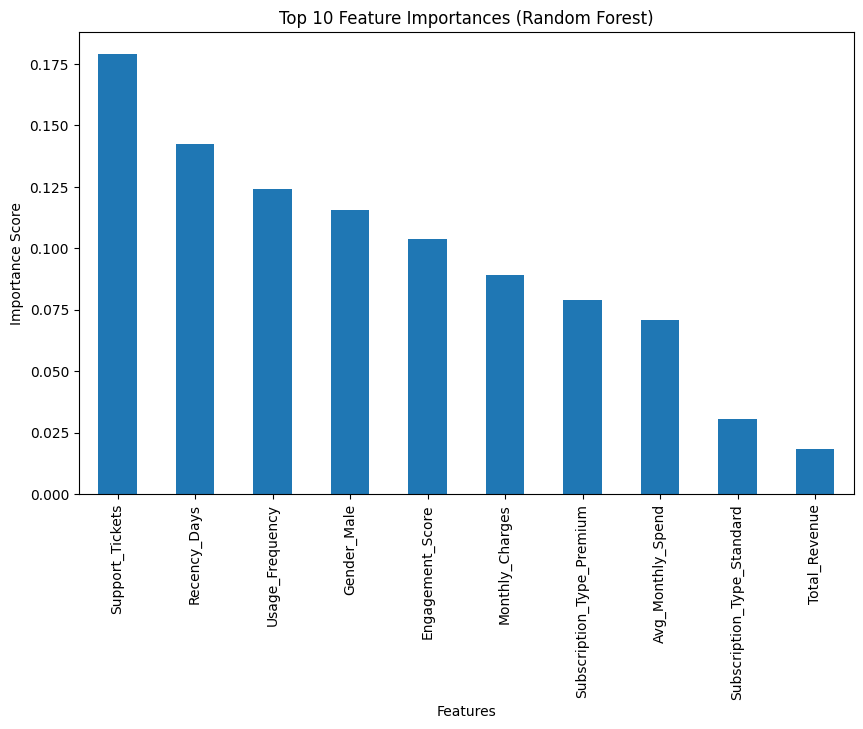

In [50]:
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


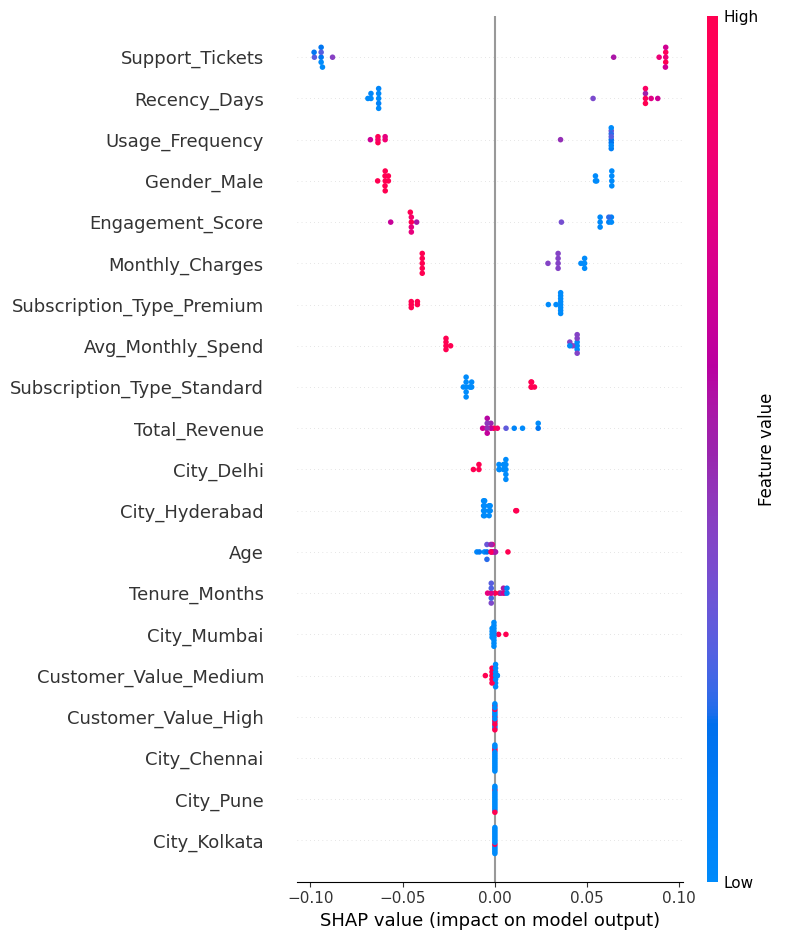

In [65]:
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

#churn only
shap.summary_plot(shap_values[:, :, 1], X)

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Save model</div> 

In [68]:
#save trained model
joblib.dump(rf_model, "churn_model_rf.pkl")

#save scaler
joblib.dump(scaler, "scaler.pkl")

#save feature column names
joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']